## Desafío 1

#### Grupo
 Juan Manuel, Rafael, Diego Cabrera
#### Objetivos:
-  Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
-  Realizar un análisis descriptivo de las principales variables.
-  Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.

 



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/properatti.csv.gz', compression='gzip', header=0)


In [ ]:
df.describe()

In [ ]:
#Copia de DF original
df_bkp = df

In [ ]:
#Print columns
df.describe('')

In [ ]:
df.dtypes

####  Limpieza del dataset
   - a. Listado de columnas a eliminar. Armar funcion
   - b. Si hiciera falta, renombrar columnas para que sean mas representativas 
   
####  Analisis descriptivo
   - a. 
####  Nuevas columnas y valores predictivos
   - a. Armar fnc para crear automaticamente columnas para usar de flag para saber si se tocan datos
   - b.

In [ ]:
df['price'].describe()

In [ ]:
df.count()

In [ ]:
#FUNCIONES 

#1. Elimina columnas
def drop_columns(df, serie):
    #print ('Eliminando columna/s ' + serie )
    df = df.drop(columns=serie,axis=1)
    return df
#2. Crea columnas "flag"
def make_flags(df, cols):
    col = {c: [add_flag(df, str(c))]
            for c in cols}

def add_flag(df, column): 
       # Creamos el nombre de la columna FLAG
    new_col = column + '_flag'
    # Creamos la columna con los valor 1 si la columna original tiene el registro null; sino, valor 0
    df[new_col] = df[column].isnull().astype(np.int8)
    print ('Columna ' + new_col +' creada' )

#3. Renombra columna
def rename_columns(df, cols):
    df = df.rename(cols, axis='columns')
    return df
    
#4. Elimina caracteres non-ascii   
def _removeNonAscii(s): return "".join(i for i in s if ord(i)<128)

#5. Calcula promedio por lugar/zona
def get_mean (state, nplace):
    global cnt_success
    global cnt_error
    try:
        cnt_success+= 1;
        if (CALCULAR_PRECIO_MT2_MEDIA_SIN_OUTLIERS):
            mn = df_price_per_m2_wo_outliers.loc[state, nplace]['mean']
        else:
            mn = df_price_per_m2.loc[state, nplace]['mean']
        return mn
    except Exception:
        #print 'error'
        #print('Error en ' +str(nplace))
        cnt_error+= 1;
        pass
        return np.nan

#6. calcula_ambientes en base a los mts2
def calcula_ambientes_xmt2 (mts):
    try:
       val = int(mts)
    except ValueError:
        return np.nan; #print("That's not an int!. Value: " + str(mts))
    val;

    if val <40:
       return 1;
    elif val <60:
       return 2;
    elif  val <80:
       return 3;
    elif  val <100:
       return 4;
    elif  val <120:
       return 5;
    elif  val >120:
       return 6;
    else:
       return np.nan;
# 7. calcula_mts2_xambientes
def calcula_mts2_xambientes (mts):
    try:
       val = int(mts)
    except ValueError:
        return np.nan; #print("That's not an int!. Value: " + str(mts))
    val;

    if val == 1:
       return 40;
    elif val == 2:
       return 60;
    elif  val == 3:
       return 80;
    elif  val == 4:
       return 100;
    elif  val == 5:
       return 120;
    elif  val >5:
       return 150;
    else:
       return np.nan;

#8. Calcula numero de ambientes en base a string 
def uno():
    return 1
def un():
    return 1
def dos():
    return 2
def tres():
    return 3
def cuatro():
    return 4
def cinco():
    return 5
def seis():
    return 6
def siete():
    return 7

switcher = {
        'un': uno,
        'uno': uno,
        'tres': tres,
        'cuatro': cuatro,
        'cinco': cinco,
        'seis': seis,
        'siete': siete
    }

def strings_to_number(argument,subfnc):
     try:
        str(argument)
        if argument != 'nan':
            print ('pricessing ' + argument)
    # Get the function from switcher dictionary
        func = switcher.get(argument,  lambda: np.nan)
    # Execute the function
        numb = func()
        if (subfnc == 'dorm'): # & (numb.is_integer()):
            numb = numb + 1  #Le sumo 1: 2 dormitorios = 3 ambientes
        return numb
     except ValueError:
        return np.nan; #print("That's not an int!. Value: " + str(mts))

#9. Agrega columnas
def make_columns(df, cols):
    col = {c: [make_col(df, str(c))]
            for c in cols}

def make_col(df, column): 
       # Creamos el nombre de la columna FLAG
    new_col = column + '_flag'
    # Creamos la columna con los valor 1 si la columna original tiene el registro null; sino, valor 0
    df[new_col] = df[column].isnull().astype(np.int8)
    print ('Columna ' + new_col +' creada' )

In [ ]:
# Variables GLobals
#Columnas a eliminar:
    #price, price_aprox_local_currency y currency: Tomamos en cuenta solo el valor en dolares (columna price_aprox_usd)
    #price_per_m2: Tomamos en cuenta solo el valor de price_usd_per_m2
COLUMNAS_A_ELIMINAR=["Unnamed: 0","lat-lon","currency","price_per_m2","price_aprox_local_currency","price","properati_url","title","image_thumbnail","expenses"];
#Columnas en las que llenaremos datos faltantes. ENtonces, creamos  columna que usaremos de flag para registrar los datos que tocamos
COLUMNAS_FLAG=['price','rooms','place']
#COlumnas a renombrar
COLUMNAS_A_RENOMBRAR={'price_aprox_usd':'price','place_name':'place','price_usd_per_m2':'price_per_m2'}
#Utilizado en fnc get_mean
cnt_success = 0
cnt_error = 0
#CALCULAR_MEDIA_SIN_OUTLIERS: Si lo definimos en true, se calculara la media del precio xmt2 por zonas SIN outliers 
CALCULAR_PRECIO_MT2_MEDIA_SIN_OUTLIERS=True


In [ ]:
#Elimino columnas
df = drop_columns(df, COLUMNAS_A_ELIMINAR)
#Renombro columnas
df = rename_columns(df, COLUMNAS_A_RENOMBRAR)

In [ ]:
#Creo nuevas columnas "flag"
make_flags(df,COLUMNAS_FLAG)

In [ ]:
#Valores nulos por columna
df.isnull().sum().sort_values()

Total registros: 121220

Valores necesarios: 

- place_name 

Barrio/3 nivel de ubicacion; 1er y 2do nivel está completo (country_name/state_name). Tenemos completo -place_with_parent_names, de ahi se puede extraer el 3er nivel
- surface_total_in_m2
- price
- price_per_m2
- rooms

# PLACE NAME

In [ ]:
df["place"].isnull().value_counts()

In [ ]:
#Verifico la 3 columna de place_with_parent_names
df[df["place"].isnull()]["place_with_parent_names"].str.split('|').str[3].value_counts()

In [ ]:
#Cargo los datos de place_name y elimino la columna place_with_parent_names
df["place"] = df["place_with_parent_names"].apply(lambda place_with_parent_names: place_with_parent_names.split('|')[3] if (place_with_parent_names.split('|')[3]) else (place_with_parent_names.split('|')[2]))
#Elimino place_with_parent_names
df = drop_columns(df, "place_with_parent_names")

In [ ]:
df['place'].value_counts().head(10)

In [ ]:
#Valores nulos por columna
df.isnull().sum().sort_values()

# Rooms

Para los casos donde no tenemos el valor "rooms", intentaremos sacar informacion de la columna descripcion. Creamos una nueva columna como flag para indicar si rooms no estaba cargado

In [ ]:
regexp="(\d+)(\s|())amb"
#a. Rooms null y en description aparece N amb*, pongo N como valor en rooms
df.loc[df['rooms'].isnull(),'rooms'] = df.loc[(df["rooms"].isnull()),"description"].str.lower().str.extract(regexp)[0]

#b. en la descripcion aparece "monoambiente" o "mono" y rooms es null, pongo 1
df.loc[((df['rooms'].isnull()) & (df['description'].str.lower().str.contains('monoambiente')) | df['description'].str.lower().str.contains('mono')),'rooms'] = 1

#c. x Dormitorios SUMAR 1
regexp="(\d+)(\s|())dorm"
df.loc[df['rooms'].isnull(),'rooms'] = (df.loc[(df["rooms"].isnull()),"description"].str.lower().str.extract(regexp)[0])




In [ ]:
df['description'][915]#1


In [ ]:
#Revisamos el valor "surface_covered_in_m2" para estimar los ambientes. 

df.loc[df["rooms"].isnull() & df["surface_covered_in_m2"].notnull(),"rooms"] =  \
df.loc[df["rooms"].isnull() & df["surface_covered_in_m2"].notnull(),"surface_covered_in_m2"].apply(lambda surface_covered_in_m2: calcula_ambientes_xmt2(surface_covered_in_m2))

#Sino, nos basamos en el valor "surface_total_in_m2" para estimar los ambientes. 

df.loc[df["rooms"].isnull() & df["surface_covered_in_m2"].isnull() & df["surface_total_in_m2"].notnull() ,"rooms"] =  \
df.loc[df["rooms"].isnull() & df["surface_covered_in_m2"].isnull() & df["surface_total_in_m2"].notnull() ,"surface_total_in_m2"] .apply(lambda surface_total_in_m2: calcula_ambientes_xmt2(surface_total_in_m2))


In [ ]:
# Calculo cantidad de rooms en base al string. Ej. "dos ambientes"
# no especifica cantidad de dormitorios:
regexp="(\w+) amb"

#df.loc[df["rooms"].isnull(),"description"].str.lower().str.extract(regexp)[0]

df.loc[df["rooms"].isnull(),"rooms"] =  \
df.loc[df["rooms"].isnull(),"description"].str.lower().str.extract(regexp)[0].apply(lambda description: strings_to_number(str(description),'amb'))
#Mismo caso, pero esta vez en base a dormitorios. Ej. "un dormitorio" = 2 ambientes
regexp="(\w+) dorm"

#df.loc[df["rooms"].isnull(),"description"].str.lower().str.extract(regexp)[0]

df.loc[df["rooms"].isnull(),"rooms"] =  \
df.loc[df["rooms"].isnull(),"description"].str.lower().str.extract(regexp)[0].apply(lambda description: strings_to_number(str(description),'dorm'))


In [ ]:
df.loc[915]

# Price

1. Price null pero tengo surface_in_m2 y price_per_m2 entonces calculo precio
2. Calculo precio promedio por state_name/place
3. Si no tengo price ni price_per_m2 pero si surface_in_m2, entonces calculo price en base al promedio por place


In [ ]:
#Price null pero tengo surface_in_m2 y price_per_m2 entonces calculo precio
df.loc[df['price'].isnull() & df["surface_total_in_m2"].notnull() & df["surface_total_in_m2"].notnull(),"price"] =  \
df.loc[df['price'].isnull() & df["surface_total_in_m2"].notnull() & df["price_per_m2"].notnull()].apply(lambda row: row.surface_total_in_m2 * row.price_per_m2, axis=1)

In [ ]:
df.loc[df['price'].isnull()]

In [ ]:

#Verifico outliers de surface_total_in_m2 y price_per_m2
plt.scatter(x=df['surface_total_in_m2'], y=df['price_per_m2'])


In [ ]:
#estadisticas de price_per_m2
df['price_per_m2'].agg(['min', 'max','mean','median','size','std','quantile'])


In [ ]:
df['price_per_m2'].describe()

In [ ]:
df['price_per_m2'].quantile([.25, .5, .75])

In [ ]:
# Obtengo los outliers para el lugar y tipo de propiedad
mean = df['price_per_m2'].mean()
std = df['price_per_m2'].std()

price_per_m2_outliers =  \
df.loc[(np.abs(df['price_per_m2'] - mean) > 3 * std)] # Que esten por encima o debajo de 3 desviaciones std.

q1 = df['price_per_m2'].quantile(.25)
q2 = df['price_per_m2'].quantile(.5)
q3 = df['price_per_m2'].quantile(.75)
ric = q3 - q1


price_per_m2_outliers_q =  \
df.loc[(df['price_per_m2'] > (df['price_per_m2'].quantile(.75) + (1.5 * ric)))] # Que esten por encima o debajo de 3 desviaciones std.


price_per_m2_outliers_q

#price_per_m2_outliers

#plt.scatter(x=price_per_m2_outliers['surface_total_in_m2'], y=price_per_m2_outliers['price_per_m2'])

In [ ]:
price_per_m2_outliers_q.describe()

In [ ]:
price_per_m2_outliers.describe()

In [ ]:
# usar nueva columna
#Elimino caracteres non ascii de place
df.loc[df['place'].notnull(),'place'] = df.loc[df['place'].notnull(),'place'].apply(lambda place: _removeNonAscii(place.lower()))
#Elimino caracteres non ascii de state_name
df.loc[df['state_name'].notnull(),'state_name'] = df.loc[df['state_name'].notnull(),'state_name'].apply(lambda state_name: _removeNonAscii(state_name.lower()))


In [ ]:
#Dataframe original
plt.scatter(x=df_bkp['surface_total_in_m2'], y=df_bkp['price_per_m2'])

In [ ]:
#Dataframe original sin outliers (aplicando desviacion estandar):
df_wo_outliers = df.drop(price_per_m2_outliers.index)
plt.scatter(x=df_wo_outliers['surface_total_in_m2'], y=df_wo_outliers['price_per_m2'])

In [ ]:
#Dataframe original sin outliers teniendo en cuenta rangos intercuartil
df_wo_outliers_2 = df.drop(price_per_m2_outliers_q.index)
plt.scatter(x=df_wo_outliers_2['surface_total_in_m2'], y=df_wo_outliers_2['price_per_m2'])

In [ ]:
#Dataframe sin outliers de price_per_m2 con el metodo (np.abs(df['price_per_m2'] - mean) > 3 * std)
df_wo_outliers_2.describe()

In [ ]:
#Dataframe sin outliers de price_per_m2 teniendo en cuenta rangos intercuartil
df_wo_outliers.describe()

In [ ]:
#Creo df con estadisticas por lugar utilizando el DF sin outliers y otro con outliers, para compararlos

df_price_per_m2 = df[df['price_per_m2'].notnull()].groupby(['state_name','place']).agg(['min', 'max','mean','median','size','std'])['price_per_m2']


df_price_per_m2_wo_outliers = df_wo_outliers_2[df_wo_outliers_2['price_per_m2'].notnull()].groupby(['state_name','place']).agg(['min', 'max','mean','median','size','std'])['price_per_m2']

In [ ]:
df[df['price'].isnull()].groupby('place').size().sort_values(ascending=False).head(10)

In [ ]:
#Medidas de tendencia central agrupado por estado y ciudad con outliers
df_price_per_m2.sort_values('mean',ascending=False ).head()

In [ ]:
#Medidas de tendencia central agrupado por estado y ciudad SIN outliers
df_price_per_m2_wo_outliers.sort_values('mean',ascending=False ).head()

In [ ]:
sns.distplot(df.loc[(df['place'] == 'general san martn') & (df['price_per_m2'].notnull()),'price_per_m2'])

In [ ]:
#
sns.distplot(df_wo_outliers.loc[(df_wo_outliers['place'] == 'general san martn') & (df_wo_outliers['price_per_m2'].notnull()),'price_per_m2'])


In [ ]:
#distplot std
sns.distplot(df_price_per_m2.loc[(df_price_per_m2['std'].notnull()),'std'])

In [ ]:
#distplot std
sns.distplot(df_price_per_m2_wo_outliers.loc[(df_price_per_m2_wo_outliers['std'].notnull()),'std'])

In [ ]:
#Correlacion entre surface_total_in_m2 y precio
df[['surface_total_in_m2','price']].corr()


In [ ]:
#Correlacion entre surface_total_in_m2 y precio sin outliers
df_wo_outliers[['surface_total_in_m2','price']].corr()


In [ ]:
#Calculo el precio por m2 en base a la media por ciudad 
df.loc[df["price_per_m2"].isnull(),'price_per_m2'] =  \
df.loc[df['price_per_m2'].isnull()].apply(lambda row: get_mean(row.state_name, row.place), axis=1)


print ('Successfully: '  + str(cnt_success))
print ('Errors: ' + str(cnt_error))


In [ ]:
df.loc[df['price_per_m2'].isnull()]

In [ ]:
df_price_per_m2.loc['santa fe',]['mean'].sort_values()
#df_price_per_m2_wo_outliers.loc['santa fe',]['mean'].sort_values()

In [ ]:
df[df['price_per_m2'].isnull()]

In [ ]:
df.loc[df['price'].isnull()]

In [ ]:
#Calculo surface_covered_in_m2 y/o surface_total_in_m2 en base a la descripcion
regexp="(\d+)(\s|())mts(..)cub|(\d+)(\s|())mts(.)cub|(\d+)(\s|())metros cub"
#surface_covered_in_m2
df.loc[df['surface_covered_in_m2'].isnull() & df["description"].notnull() & df["price"].isnull(),'surface_covered_in_m2'] =  \
df.loc[df['surface_covered_in_m2'].isnull() & df["description"].notnull() & df["price"].isnull(),'description'].str.lower().str.extract(regexp)[0]
regexp="(\d+)(\s|())mts(..)cub|(\d+)(\s|())mts(.)cub|(\d+)(\s|())metros cub"
#surface_total_in_m2: surface_covered_in_m2 y surface_total_in_m2 Null
regexp="(\d+)(\s|())mts|(\d+)(\s|())metros"
df.loc[df['surface_total_in_m2'].isnull() & df['surface_covered_in_m2'].isnull() & df["description"].notnull() & df["price"].isnull(),'surface_total_in_m2'] =  \
df.loc[df['surface_total_in_m2'].isnull() & df['surface_covered_in_m2'].isnull() & df["description"].notnull() & df["price"].isnull(),'description'].str.lower().str.extract(regexp)[0]


In [ ]:
#Valido por ejemplo esperanza santa fe, no tiene estadisticas
df.loc[df['place'] == 'bella italia'].groupby(['state_name','place']).agg(['min', 'max','mean','size','std'])['price_per_m2']

In [ ]:
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_total_in_m2'].notnull()]

In [ ]:
#Tengo price_per_m2 y surface_total_in_m2 pero no precio entonces calculo precio
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_total_in_m2'].notnull(), 'price'] =  \
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_total_in_m2'].notnull()].apply(lambda row: (np.int(row.price_per_m2) * np.int(row.surface_total_in_m2)), axis=1)

In [ ]:
#Tengo price_per_m2 y surface_covered_in_m2 pero no precio entonces calculo precio
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_covered_in_m2'].notnull(), 'price'] = \
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_covered_in_m2'].notnull()].apply(lambda row: (np.int(row.price_per_m2) * np.int(row.surface_covered_in_m2)), axis=1)

In [ ]:
#Cantidad de precios calculados hasta el momento
print ('Price:')
df[df['price_flag'] == 1]['price_flag'].sum() - df['price'].isnull().sum()


In [ ]:
print ('Rooms:')
df[df['rooms_flag'] == 1]['rooms_flag'].sum() - df['rooms'].isnull().sum()

In [ ]:
df.loc[(df['price'].isnull()) & (df['place'] == 'rosario')].sort_values(['state_name','place'],ascending=False)

In [ ]:
#Cantidad de precios faltantes por lugar
df[df['price'].isnull()].groupby('place').size().sort_values(ascending=False)#.head(15)

In [ ]:
#Cantidad de precios faltantes por lugar
df[df['price_flag'] == 1].groupby('place').size().sort_values(ascending=False)#.sum()

In [ ]:
#tengo ambiente y price_per_m2 y no tengo precio ni surface_covered_in_m2
#entonces estimo surface_covered_in_m2 en base a los ambientes y luego calculo precio

#df[df['price_per_m2'].notnull() & df['rooms'].notnull() & df['price'].isnull() & df['surface_covered_in_m2'].isnull()]['price_per_m2']

df.loc[df["price_per_m2"].notnull() & df["rooms"].notnull() & df['price'].isnull() & df['surface_covered_in_m2'].isnull(),"surface_covered_in_m2"] =  \
df.loc[df["price_per_m2"].notnull() & df["rooms"].notnull() & df['price'].isnull() & df['surface_covered_in_m2'].isnull(),"rooms"].apply(lambda rooms: calcula_mts2_xambientes(rooms))


In [ ]:
#Vuelvo a ejecutar 'Tengo price_per_m2 y surface_covered_in_m2 pero no precio entonces calculo precio'
#Tengo price_per_m2 y surface_total_in_m2 pero no precio entonces calculo precio
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_total_in_m2'].notnull(), 'price'] =  \
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_total_in_m2'].notnull()].apply(lambda row: (np.int(row.price_per_m2) * np.int(row.surface_total_in_m2)), axis=1)

#Tengo price_per_m2 y surface_covered_in_m2 pero no precio entonces calculo precio
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_covered_in_m2'].notnull(), 'price'] = \
df.loc[df['price'].isnull() & df['price_per_m2'].notnull() & df['surface_covered_in_m2'].notnull()].apply(lambda row: (np.int(row.price_per_m2) * np.int(row.surface_covered_in_m2)), axis=1)

In [ ]:
#PUEDEN HABER precio x mtr pero no precio

df.loc[df['price'].isnull() & df['surface_covered_in_m2'].notnull()]

In [ ]:
df.describe()

In [ ]:
#Valores nulos por columna
df.isnull().sum().sort_values()

In [ ]:
df['cochera'] = 0
df['pileta'] = 0


In [ ]:
#b. en la descripcion aparece "monoambiente" o "mono" y rooms es null, pongo 1
df.loc[((df['description'].notnull()) & (df['description'].str.lower().str.contains('coch')) | (df['description'].str.lower().str.contains('coch.'))),'cochera'] = 1
df.loc[((df['description'].notnull()) & (df['description'].str.lower().str.contains('pile')) | (df['description'].str.lower().str.contains('pil.')) | (df['description'].str.lower().str.contains('pisc'))),'pileta'] = 1


In [ ]:
df["cochera"].value_counts()

In [ ]:
df["pileta"].value_counts()

In [ ]:
df

In [ ]:
#Valores nulos por columna
df.isnull().sum().sort_values()

In [ ]:
#Guardo nuevo archivo con todo lo realizado en el desafio1
df.to_csv('data/properatti_desafio1.csv.gz', compression='gzip')

## Desafío 2

#### Grupo
 Juan Manuel, Rafael, Diego Cabrera


#### Objetivos:
-  Estimar un modelo de regresión lineal para hacer predicciones para el precio
de las propiedades. ¿Modelará el precio total o el precio por metro cuadrado?
-  Usar cross-validation para validar el modelo.
-  Quizá le sea útil prestar cierta atención a la estructura espacial de los precios
a la hora de construir sus features.
-  Aplicar regularización a modelos lineales. La idea es la siguiente: estimar una
regresión Ridge, una Lasso y una Elastic Net sobre el dataset. Para ello
deberán usar cross-validation para tunear el hiper parámetro de
regularización.
-  ¿Cómo son las performances entre los modelos regularizados y no
regularizado? ¿Cuál funciona mejor? ¿Qué “hace” una regresión Ridge? ¿Y
una Lasso? ¿Qué hace Elastic Net? ¿Qué diferencias hay con la regresión
lineal sin regularizar?
-  Seleccionar mediante muestreo aleatorio simple una submuestra de 100
propiedades. Este será su portafolio de propiedades. En base al mejor
modelo que haya encontrado determine cuáles de las propiedades, tanto en
su portafolio como fuera de él, se encuentran sobrevaluados o subvaluados.
¿Cómo compararía el grado de subvaluación o sobrevaluación entre dos
propiedades con precios distintos?
-  Teniendo en cuenta que podría comprar y vender propiedades al precio de
mercado,asumamos que no hay costos de transacción ni de comprar ni de
vender con un capital inicial igual al valor de mercado de las propiedades en
su portafolio. ¿Cuál propiedades vendería y cuáles compraría? Piense que
busca arbitrar entre estas propiedades “caras” y “baratas”.

 



In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from scipy.sparse import coo_matrix, hstack
from scipy import stats
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
%matplotlib inline

df = pd.read_csv('data/properatti_desafio1.csv.gz', compression='gzip', header=0)

### Separo los datos que tienen precio de los que no


In [4]:
def get_traindf_withoutnulls(df):
    df_predict = df.loc[df['price_per_m2'].isnull()]
    df_train = df.drop(df_predict.index)

    return df_train, df_predict

In [5]:
def get_features_labels(df):
    # Obtengo los labels (precio aprox en USD)
    Y = df['price_per_m2']

    # Obtengo los valores sin price
    X = df.drop('price_per_m2', axis=1)
    #Estandarizado
    #X = StandardScaler().fit_transform(mX)
    #X = PolynomialFeatures(2,include_bias=True,interaction_only=False).fit_transform(mX)
    
    return X, Y

## Preparamos datos

In [6]:
#Saco outliers
q1 = df['price_per_m2'].quantile(.25)
q2 = df['price_per_m2'].quantile(.5)
q3 = df['price_per_m2'].quantile(.75)
ric = q3 - q1

price_per_m2_outliers =  \
df.loc[(df['price_per_m2'] > (df['price_per_m2'].quantile(.75) + (1.5 * ric)))] # Que esten por encima o debajo de 3 desviaciones std.


df_wo_outliers = df.drop(price_per_m2_outliers.index)


# Dataframe donde muestro los resultados
df_resultados = pd.DataFrame(columns=['Model', 'MSE', 'R^2', 'Alpha','Time (seconds)'])


## Normalizamos los X con MinMax

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

minmaxscaler_model = MinMaxScaler()

#MinMax
# Aplico scale a las columnas elegidas
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

minmaxscaler_model = MinMaxScaler()

# Columnas a normalizar
#columnas= ['price_per_m2']
#columnas.append('price')


# Aplico scale a las columnas elegidas
#df[columnas] = minmaxscaler_model.fit_transform(df[columnas])


In [8]:
from sklearn.preprocessing import FunctionTransformer

# Instancio el Optimus Prime con log1p
transformer = FunctionTransformer(np.log1p)

# Obtengo los valores de precio que no son NaN, como un numpy array
price_per_m2 = df.loc[df['price_per_m2'].notnull(),'price_per_m2'].copy().values

# Aplico la transformación y la asigno directamente a la columna de price_per_m2
df.loc[df['price_per_m2'].notnull(),'price_per_m2'] = transformer.transform([price_per_m2])[0]

## Generacion de dummies

In [9]:
df

,Unnamed: 0,operation,property_type,place,country_name,state_name,geonames_id,lat,lon,price,...,surface_covered_in_m2,price_per_m2,floor,rooms,description,price_flag,rooms_flag,place_flag,cochera,pileta
0,0,sell,PH,mataderos,Argentina,capital federal,3430787.0,-34.661824,-58.508839,62000.00,...,40.0,7.028443,NaN,2.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",0,1,0,0,0
1,1,sell,apartment,la plata,Argentina,bs.as. g.b.a. zona sur,3432039.0,-34.903883,-57.964330,150000.00,...,NaN,7.309957,NaN,NaN,Venta de departamento en décimo piso al frente...,0,1,0,1,0
2,2,sell,apartment,mataderos,Argentina,capital federal,3430787.0,-34.652262,-58.522982,72000.00,...,55.0,7.177852,NaN,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,0,1,0,0,0
3,3,sell,PH,liniers,Argentina,capital federal,3431333.0,-34.647797,-58.516424,95000.00,...,NaN,7.498265,NaN,3.0,PH 3 ambientes con patio. Hay 3 deptos en lote...,0,1,0,0,0
4,4,sell,apartment,mar del plata,Argentina,buenos aires costa atlntica,3435548.0,-38.002626,-57.549447,64000.00,...,35.0,7.511837,NaN,1.0,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,0,1,0,0,0
5,5,sell,house,gualeguaych,Argentina,entre ros,3433657.0,-33.014071,-58.519828,NaN,...,NaN,NaN,NaN,2.0,"Casa en el perímetro del barrio 338, ubicada e...",1,1,0,0,0
6,6,sell,PH,vicente lpez,Argentina,bs.as. g.b.a. zona norte,3430511.0,-34.532957,-58.521782,130000.00,...,78.0,7.112666,NaN,3.0,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,0,1,0,0,0
7,7,sell,apartment,belgrano,Argentina,capital federal,3436077.0,-34.559873,-58.443362,138000.00,...,40.0,8.028673,NaN,1.0,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,0,1,0,0,1
8,8,sell,apartment,belgrano,Argentina,capital federal,3436077.0,-34.559873,-58.443362,195000.00,...,60.0,8.006701,NaN,3.0,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,0,1,0,0,1
9,9,sell,house,rosario,Argentina,santa fe,3838574.0,-32.942031,-60.725919,25798.49,...,NaN,7.401703,NaN,1.0,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,0,1,0,0,0


In [10]:
df_with_outliers = df
df = df_wo_outliers

dummies_places = pd.get_dummies(df['state_name'] + df['place'], drop_first=True, prefix='places', sparse=True)
dummies_prop_types = pd.get_dummies(df['property_type'], drop_first=True, prefix='property_type', sparse=True)
df_with_dummies = df[['price_per_m2','cochera','pileta']].join(dummies_places).join(dummies_prop_types)
#df_with_dummies = model_df.join(dummies_places).join(dummies_prop_types)

df_with_dummies.describe()
#df.loc[df['price_per_m2'].isnull()]

#df_with_dummies[['price_per_m2','cochera','pileta']] = minmaxscaler_model.fit_transform(df_with_dummies[['price_per_m2','cochera','pileta']])


,price_per_m2,cochera,pileta,places_bs.as. g.b.a. zona norteescobar,places_bs.as. g.b.a. zona nortegeneral san martn,places_bs.as. g.b.a. zona nortejos c paz,places_bs.as. g.b.a. zona nortemalvinas argentinas,places_bs.as. g.b.a. zona nortepilar,places_bs.as. g.b.a. zona nortesan fernando,places_bs.as. g.b.a. zona nortesan isidro,...,places_tucumnlules,places_tucumnsan miguel de tucumn,places_tucumntaf del valle,places_tucumntaf viejo,places_tucumntucumn,places_tucumnvilla belgrano,places_tucumnyerba buena,property_type_apartment,property_type_house,property_type_store
count,114925.000000,115938.000000,115938.000000,115938.000000,115938.000000,115938.00000,115938.000000,115938.000000,115938.000000,115938.000000,...,115938.000000,115938.000000,115938.000000,115938.000000,115938.000000,115938.000000,115938.000000,115938.000000,115938.000000,115938.000000
mean,1660.530610,0.355138,0.271844,0.016423,0.013404,0.00119,0.004218,0.027592,0.008781,0.024599,...,0.000017,0.003079,0.000190,0.000138,0.000664,0.000009,0.001639,0.572746,0.344960,0.032871
std,697.091541,0.478557,0.444912,0.127094,0.114996,0.03448,0.064808,0.163802,0.093293,0.154901,...,0.004153,0.055406,0.013774,0.011747,0.025763,0.002937,0.040449,0.494682,0.475357,0.178300
min,0.600000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1257.155556,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1637.773679,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2066.666667,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,3533.333333,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


IndexingError: Too many indexers

In [12]:
df_train, df_predict = get_traindf_withoutnulls(df_with_dummies)


In [13]:
# features y labels
X, Y = get_features_labels(df_train)

df_train
#X = PolynomialFeatures().fit_transform(X)

# Sets: 70% fit, 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1, train_size=0.70)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((80447, 576), (80447,))
((34478, 576), (34478,))


## Ridge

In [49]:
al_ridge = np.linspace(0.001, 0.3, 300)
ridge_model = RidgeCV(alphas=al_ridge,cv=kf)
start_time = time.clock()
#FIT

ridge_model.fit(X_train,Y_train)
fit_time = time.clock() - start_time
print "Fit time", fit_time, "seconds"

score_Ridge = ridge_model.score(X_train,Y_train)


Y_predicted_Train_Ridge = ridge_model.predict(X_train)


print("Test MSE lineal=", mean_squared_error(Y_train,Y_predicted_Train_Ridge), "/n"
     "score=",  score_Ridge, "\n")
Y_predicted_Test_Ridge = ridge_model.predict(X_test)
score_Test_Ridge = ridge_model.score(X_test,Y_test)
print("Test MSE lineal=", np.square(mean_squared_error(Y_test,Y_predicted_Test_Ridge)), "/n"
     "score=",  score_Test_Ridge, "\n")


# Agrego los resultados al dataframe de resultados
row = {'Model':'Ridge', 'MSE': np.square(mean_squared_error(Y_test,Y_predicted_Test_Ridge)), 'R^2':score_Test_Ridge, 'Alpha': np.nan, 'Cant. Cols.': len(X_train.columns), 'Time (seconds)': fit_time}
df_resultados = df_resultados.append(row, ignore_index=True)

# Muestro los resultados
df_resultados

Fit time 7086.265513 seconds
('Test MSE lineal=', 182951.42347734363, '/nscore=', 0.6244586671260501, '\n')
('Test MSE lineal=', 33300965726.047417, '/nscore=', 0.6222203253663936, '\n')


,Model,MSE,R^2,Alpha,Time (seconds),Cant. Cols.
0,Regresion lineal normalizada,1.933596e+05,0.603094,NaN,16.152898,576.0
1,Regresion lineal sin Normalizar,1.829335e+05,0.624496,NaN,16.151828,576.0
2,Lasso,1.878302e+05,0.611156,0.1,65.572554,576.0
3,Elastic,3.899321e+05,0.193608,1.0,1.296124,576.0
4,Ridge,3.330097e+10,0.622220,NaN,7086.265513,576.0


## Regresion lineal

In [14]:

lm = LinearRegression(normalize=True)

start_time = time.clock()

#FIT
lm.fit(X_train,Y_train)
fit_time = time.clock() - start_time
print "Fit time", fit_time, "seconds"

score = lm.score(X_train,Y_train)


Y_predicted_Train = lm.predict(X_train)


print("Test MSE lineal=", mean_squared_error(Y_train,Y_predicted_Train), "/n"
     "score=",  score, "\n")
Y_predicted_Test = lm.predict(X_test)
score_Test = lm.score(X_test,Y_test)
print("Test MSE lineal=", np.square(mean_squared_error(Y_test,Y_predicted_Test)), "/n"
     "score=",  score_Test, "\n")


# Agrego los resultados al dataframe de resultados
row = {'Model':'Regresion lineal normalizada', 'MSE': mean_squared_error(Y_test,Y_predicted_Test), 'R^2':score, 'Alpha': np.nan, 'Cant. Cols.': len(X_train.columns), 'Time (seconds)': fit_time}
df_resultados = df_resultados.append(row, ignore_index=True)


#SIN normalizar


lm = LinearRegression(normalize=False)

start_time = time.clock()

#FIT
lm.fit(X_train,Y_train)
fit_time = time.clock() - start_time
print "Fit time", fit_time, "seconds"

score = lm.score(X_train,Y_train)


Y_predicted_Train_nn = lm.predict(X_train)


print("Test MSE lineal=", mean_squared_error(Y_train,Y_predicted_Train_nn), "/n"
     "score=",  score, "\n")
Y_predicted_Test_nn = lm.predict(X_test)
score_Test_nn = lm.score(X_test,Y_test)
print("Test MSE lineal=", np.square(mean_squared_error(Y_test,Y_predicted_Test_nn)), "/n"
     "score=",  score_Test, "\n")


# Agrego los resultados al dataframe de resultados
row = {'Model':'Regresion lineal sin Normalizar', 'MSE': mean_squared_error(Y_test,Y_predicted_Test_nn), 'R^2':score, 'Alpha': np.nan, 'Cant. Cols.': len(X_train.columns), 'Time (seconds)': fit_time}
df_resultados = df_resultados.append(row, ignore_index=True)


# Muestro los resultados
df_resultados

Fit time 16.152898 seconds
('Test MSE lineal=', 193359.6102460066, '/nscore=', 0.6030939558949907, '\n')
('Test MSE lineal=', 2.21385579339987e+65, '/nscore=', -9.740580464039892e+26, '\n')
Fit time 16.151828 seconds
('Test MSE lineal=', 182933.46113885022, '/nscore=', 0.6244955381184214, '\n')
('Test MSE lineal=', 2.269145513548972e+51, '/nscore=', -9.740580464039892e+26, '\n')


,Model,MSE,R^2,Alpha,Time (seconds),Cant. Cols.
0,Regresion lineal normalizada,193359.610246,0.603094,NaN,16.152898,576.0
1,Regresion lineal sin Normalizar,182933.461139,0.624496,NaN,16.151828,576.0


Text(0.5,0,'Valores Reales (con scale)')

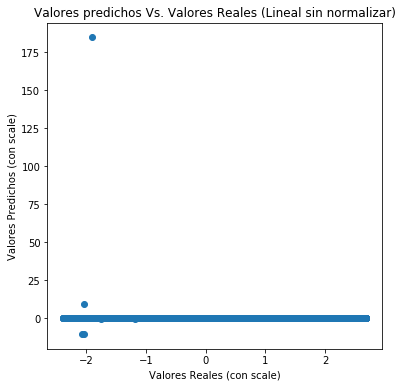

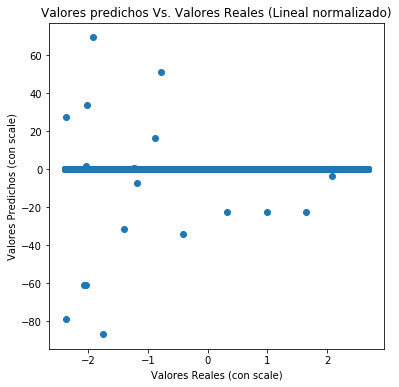

In [23]:

xs = Y_test
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = Y_predicted_Test_nn
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]


plt.figure(figsize=(6,6))
plt.title('Valores predichos Vs. Valores Reales (Lineal sin normalizar)', fontsize=12)
plt.scatter(x=xs, y =ys)
plt.ylabel('Valores Predichos (con scale)')
plt.xlabel('Valores Reales (con scale)')



xs = Y_test
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = Y_predicted_Test
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]


plt.figure(figsize=(6,6))
plt.title('Valores predichos Vs. Valores Reales (Lineal normalizado)', fontsize=12)
plt.scatter(x=xs, y =ys)
plt.ylabel('Valores Predichos (con scale)')
plt.xlabel('Valores Reales (con scale)')



## Lasso

In [15]:
#Valores nulos por columna
df_train.isnull().sum().sort_values()

price_per_m2                                           0
places_mendozachacras de coria                         0
places_mendozadorrego                                  0
places_mendozael sauce                                 0
places_mendozagobernador benegas                       0
places_mendozagodoy cruz                               0
places_mendozajunn                                     0
places_mendozabuena nueva                              0
places_mendozalas heras                                0
places_mendozalujn de cuyo                             0
places_mendozamaip                                     0
places_mendozamalarge                                  0
places_mendozamayor drummond                           0
places_mendozamendoza                                  0
places_mendozanueva ciudad                             0
places_mendozalos corralitos                           0
places_mendozapedro molina                             0
places_la riojavilla unin      

In [16]:
al_lasso = np.linspace(0.1, 0.5, 300)
kf = KFold(n_splits=5, shuffle=True, random_state=12)

#lasso_model = linear_model.Lasso(alpha=10)
lasso_model = linear_model.LassoCV(alphas=al_lasso, cv=kf, normalize=False)

start_time = time.clock()
#FIT
lasso_model_fitted = lasso_model.fit(X_train,Y_train)
fit_time = time.clock() - start_time
print "Fit time", fit_time, "seconds"

start_time = time.clock()
# Predict
Y_predicted_lasso = lasso_model_fitted.predict(X_test)
predict_time = time.clock() - start_time
print "Predict time", predict_time, "seconds"

# Obtengo el score R2
#r2_score_lasso = lasso_model_fitted.score(X, Y)
r2_score_lasso = lasso_model.score(X_test, Y_test)
# Obtengo el MSE
mse_score_lasso = mean_squared_error(Y_test, Y_predicted_lasso)

# Agrego los resultados al dataframe de resultados
row = {'Model':'Lasso', 'MSE': mse_score_lasso.mean(), 'R^2':r2_score_lasso.mean(), 'Alpha': lasso_model_fitted.alpha_, 'Cant. Cols.': len(X_train.columns), 'Time (seconds)': fit_time}
df_resultados = df_resultados.append(row, ignore_index=True)

# Muestro los resultados
df_resultados


Fit time 65.572554 seconds
Predict time 0.273928 seconds


,Model,MSE,R^2,Alpha,Time (seconds),Cant. Cols.
0,Regresion lineal normalizada,193359.610246,0.603094,NaN,16.152898,576.0
1,Regresion lineal sin Normalizar,182933.461139,0.624496,NaN,16.151828,576.0
2,Lasso,187830.234585,0.611156,0.1,65.572554,576.0


Text(0.5,0,'Valores Reales (con scale)')

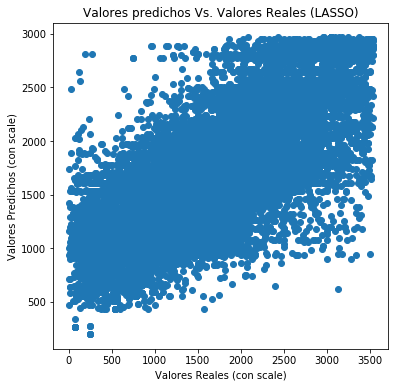

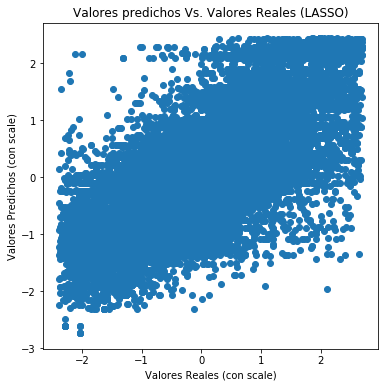

In [18]:
plt.figure(figsize=(6,6))
plt.title('Valores predichos Vs. Valores Reales (LASSO)', fontsize=12)
plt.scatter(x=Y_test, y =Y_predicted_lasso)
plt.ylabel('Valores Predichos (con scale)')
plt.xlabel('Valores Reales (con scale)')

#scaler = preprocessing.MinMaxScaler()

#xs = scaler.fit_transform(Y_test)
#ys = scaler.fit_transform(Y_predicted_lasso)


xs = Y_test
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = Y_predicted_lasso
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]


plt.figure(figsize=(6,6))
plt.title('Valores predichos Vs. Valores Reales (LASSO)', fontsize=12)
plt.scatter(x=xs, y =ys)
plt.ylabel('Valores Predichos (con scale)')
plt.xlabel('Valores Reales (con scale)')



## Elastic Net

In [19]:
elastic = linear_model.ElasticNet()

start_time = time.clock()

#FIT
elastic_model_fitted = elastic.fit(X_train,Y_train)
fit_time = time.clock() - start_time
print "Fit time", fit_time, "seconds"

start_time = time.clock()

# Predict
Y_predicted_elastic = elastic_model_fitted.predict(X_test)
predict_time = time.clock() - start_time
print "Predict time", predict_time, "seconds"

# Obtengo el score R2
r2_score_elastic = elastic_model_fitted.score(X, Y)
# Obtengo el MSE
mse_score_elastic = mean_squared_error(Y_test, Y_predicted_elastic)

# Agrego los resultados al dataframe de resultados
row = {'Model':'Elastic', 'MSE': mse_score_elastic.mean(), 'R^2':r2_score_elastic.mean(), 'Alpha': elastic_model_fitted.alpha, 'Cant. Cols.': len(X_train.columns), 'Time (seconds)': fit_time}
df_resultados = df_resultados.append(row, ignore_index=True)
# Muestro los resultados
df_resultados


Fit time 1.296124 seconds
Predict time 0.272864 seconds


,Model,MSE,R^2,Alpha,Time (seconds),Cant. Cols.
0,Regresion lineal normalizada,193359.610246,0.603094,NaN,16.152898,576.0
1,Regresion lineal sin Normalizar,182933.461139,0.624496,NaN,16.151828,576.0
2,Lasso,187830.234585,0.611156,0.1,65.572554,576.0
3,Elastic,389932.133663,0.193608,1.0,1.296124,576.0


In [ ]:
Y_test

In [51]:
#  Me guardo los indices originales para poder identificar luego cada fila
y_index = Y_test.index
# Reinicio los indices para poder unir los Y de tes ty los Y predichos
Y_test_indexless = Y_test.reset_index(drop=True)

# Concateno los Y de todos los modelos
#Y_values = pd.DataFrame({'y_real': Y_test_indexless, 'y_linear': Y_predicted_linear ,'y_ridge': Y_predicted_ridge, 'y_lasso': Y_predicted_lasso})

df_result_lasso = pd.DataFrame({'y_real': Y_test_indexless, 'y_lasso': Y_predicted_lasso})
df_result_lasso['result_dif'] = df_result_lasso['y_real']-df_result_lasso['y_lasso']

# Aplico scale a las columnas elegidas
xs = df_result_lasso['y_real']
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df_result_lasso['y_lasso']
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

df_result_lasso_scaled = pd.DataFrame({'y_real': xs, 'y_lasso': ys})
df_result_lasso_scaled['result_dif'] = df_result_lasso_scaled['y_real']-df_result_lasso_scaled['y_lasso']


df_result_elastic = pd.DataFrame({'y_real': Y_test_indexless, 'y_elastic': Y_predicted_elastic})
df_result_elastic['result_dif'] = df_result_elastic['y_real']-df_result_elastic['y_elastic']


# Aplico scale a las columnas elegidas
xs = df_result_elastic['y_real']
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df_result_elastic['y_elastic']
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

df_result_elastic_scaled = pd.DataFrame({'y_real': xs, 'y_elastic': ys})
df_result_elastic_scaled['result_dif'] = df_result_elastic_scaled['y_real']-df_result_elastic_scaled['y_elastic']


df_result_lineal = pd.DataFrame({'y_real': Y_test_indexless, 'y_lineal': Y_predicted_Test})
df_result_lineal['result_dif'] = df_result_lineal['y_real']-df_result_lineal['y_lineal']

# Aplico scale a las columnas elegidas
xs = df_result_lineal['y_real']
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df_result_lineal['y_lineal']
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

df_result_lineal_scaled = pd.DataFrame({'y_real': xs, 'y_lineal': ys})
df_result_lineal_scaled['result_dif'] = df_result_lineal_scaled['y_real']-df_result_lineal_scaled['y_lineal']


df_result_lineal_nn = pd.DataFrame({'y_real': Y_test_indexless, 'y_lineal_nn': Y_predicted_Test_nn})
df_result_lineal_nn['result_dif'] = df_result_lineal_nn['y_real']-df_result_lineal_nn['y_lineal_nn']

# Aplico scale a las columnas elegidas
xs = df_result_lineal_nn['y_real']
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df_result_lineal_nn['y_lineal_nn']
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

df_result_lineal_nn_scaled = pd.DataFrame({'y_real': xs, 'y_lineal_nn': ys})
df_result_lineal_nn_scaled['result_dif'] = df_result_lineal_nn_scaled['y_real']-df_result_lineal_nn_scaled['y_lineal_nn']



df_result_ridge = pd.DataFrame({'y_real': Y_test_indexless, 'y_ridge': Y_predicted_Test_Ridge})
df_result_ridge['result_dif'] = df_result_ridge['y_real']-df_result_ridge['y_ridge']
# Aplico scale a las columnas elegidas
xs = df_result_ridge['y_real']
mean = np.mean(xs)
std = np.std(xs)
xs = [(x - mean) / std for x in xs]

ys = df_result_ridge['y_ridge']
mean = np.mean(ys)
std = np.std(ys)
ys = [(y - mean) / std for y in ys]

df_result_ridge_scaled = pd.DataFrame({'y_real': xs, 'y_ridge': ys})
df_result_ridge_scaled['result_dif'] = df_result_ridge_scaled['y_real']-df_result_ridge_scaled['y_ridge']







In [17]:
df_result_lineal

,y_lineal,y_real,result_dif
0,2556.038411,2542.857143,-13.181268
1,785.031468,919.459353,134.427885
2,1070.613734,1212.337945,141.724211
3,2022.182804,1400.000000,-622.182804
4,1542.794969,1000.000000,-542.794969
5,1546.932545,443.750000,-1103.182545
6,1015.394542,45.988610,-969.405932
7,2119.179740,1863.629111,-255.550629
8,2657.829102,3232.558140,574.729037
9,928.203731,1500.000000,571.796269


## Resultados

In [ ]:
# Muestro los resultados
df_resultados

Text(0.5,0,'Valores Reales')

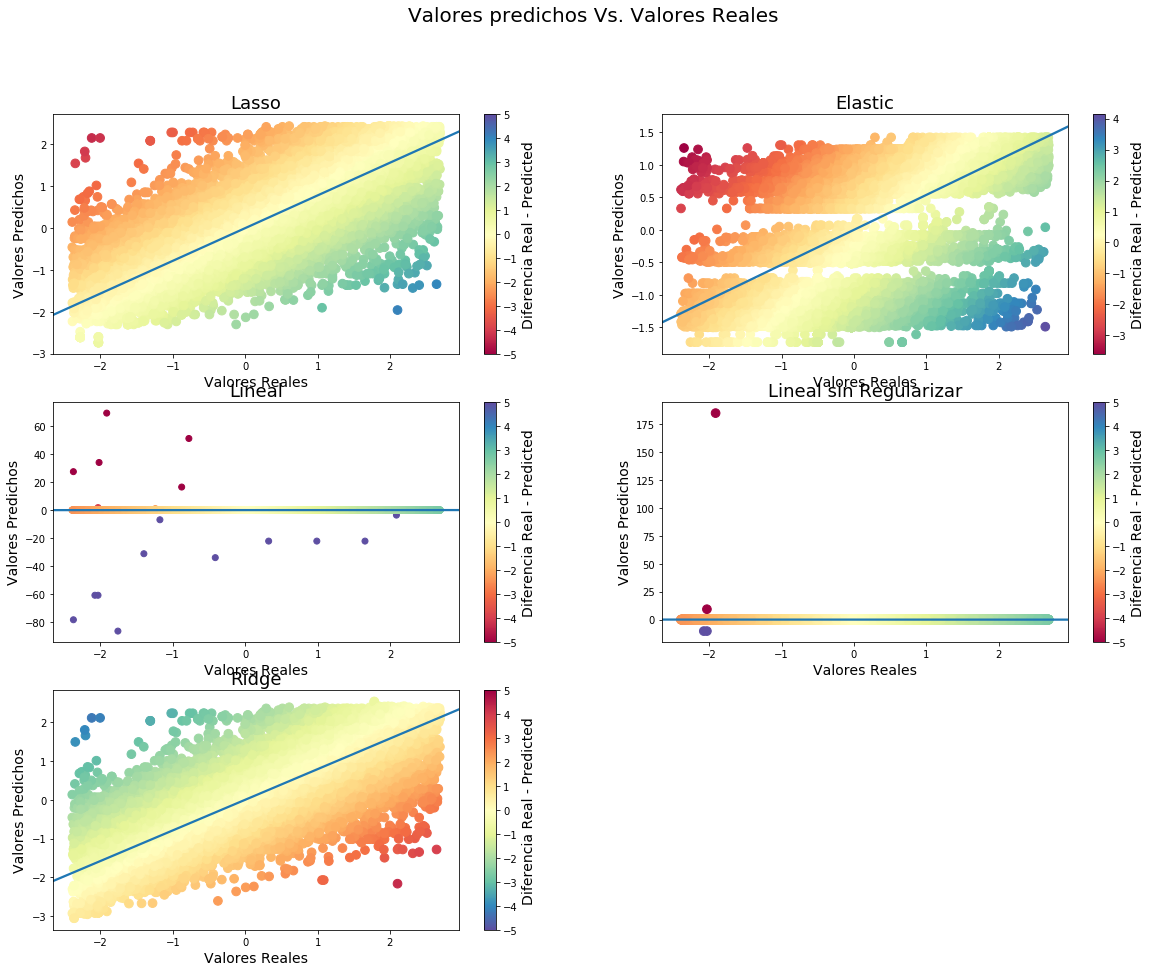

In [52]:
plt.figure(figsize=(20,15))

#ticks de colorbar
colorbar_ticks = [-5, -4,-3,-2,-1,0,1,2,3,4, 5]

cmap = plt.cm.Spectral
norm = plt.Normalize(vmin=-5, vmax=5)
#z = np.array(df_result_lasso['result_dif'])


# LASSO
plt.subplot(3,2,1)


# Scatter
#points = plt.scatter(x=xs, y=ys, c=df_result_lasso['result_dif'],  cmap=plt.cm.Spectral, vmin=-5, vmax=5)
points = plt.scatter(x=df_result_lasso_scaled['y_real'], y=df_result_lasso_scaled['y_lasso'], c=df_result_lasso_scaled['result_dif'], norm=norm, cmap = plt.cm.Spectral, s=75) #Nos altaria normalizar y agregar norm= norm
# Colorbar
#clbr = plt.colorbar()
clbr = plt.colorbar(ticks=colorbar_ticks)
clbr.set_label('Diferencia Real - Predicted', fontsize=14)
# Regression
ax1 = sns.regplot(x="y_real", y="y_lasso", data=df_result_lasso_scaled, scatter=False)
# Establezco los títulos
plt.title('Lasso', fontsize=18)
plt.ylabel('Valores Predichos', fontsize=14)
plt.xlabel('Valores Reales',fontsize=14)



# Elastic
plt.subplot(3,2,2)

# Scatter
#points = plt.scatter(x=s, y=t, c=r,  cmap=plt.cm.Spectral, vmin=-5, vmax=5)
points = plt.scatter(x=df_result_elastic_scaled['y_real'], y=df_result_elastic_scaled['y_elastic'], c=df_result_elastic_scaled['result_dif'], cmap = plt.cm.Spectral, s=75) #Nos altaria normalizar y agregar norm= norm
# Colorbar
clbr = plt.colorbar(ticks=colorbar_ticks)
clbr.set_label('Diferencia Real - Predicted', fontsize=14)
# Regression
ax1 = sns.regplot(x="y_real", y="y_elastic", data=df_result_elastic_scaled, scatter=False)
# Establezco los títulos
plt.title('Elastic', fontsize=18)
plt.ylabel('Valores Predichos', fontsize=14)
plt.xlabel('Valores Reales',fontsize=14)


# Lineal
plt.subplot(3,2,3)

# Scatter
points = plt.scatter(x=df_result_lineal_scaled['y_real'], y=df_result_lineal_scaled['y_lineal'], c=df_result_lineal_scaled['result_dif'],  cmap=plt.cm.Spectral, vmin=-5, vmax=5)
#points = plt.scatter(x=df_result_lineal['y_real'], y=df_result_lineal['y_lineal'], c=df_result_lineal['result_dif'], cmap = plt.cm.Spectral, s=75, norm=norm) #Nos altaria normalizar y agregar norm= norm
# Colorbar
clbr = plt.colorbar(ticks=colorbar_ticks)
clbr.set_label('Diferencia Real - Predicted', fontsize=14)
# Regression
ax1 = sns.regplot(x="y_real", y="y_lineal", data=df_result_lineal_scaled, scatter=False)
# Establezco los títulos
plt.title('Lineal', fontsize=18)
plt.ylabel('Valores Predichos', fontsize=14)
plt.xlabel('Valores Reales',fontsize=14)


# Lineal sin regularizar
plt.subplot(3,2,4)

# Scatter
#points = plt.scatter(x=s, y=t, c=r,  cmap=plt.cm.Spectral, vmin=-5, vmax=5)
points = plt.scatter(x=df_result_lineal_nn_scaled['y_real'], y=df_result_lineal_nn_scaled['y_lineal_nn'], c=df_result_lineal_nn_scaled['result_dif'], norm=norm, cmap = plt.cm.Spectral, s=75) #Nos altaria normalizar y agregar norm= norm
# Colorbar
#clbr = plt.colorbar()
clbr = plt.colorbar(ticks=colorbar_ticks)
clbr.set_label('Diferencia Real - Predicted', fontsize=14)
# Regression
ax1 = sns.regplot(x="y_real", y="y_lineal_nn", data=df_result_lineal_nn_scaled, scatter=False)
# Establezco los títulos
plt.title('Lineal sin Regularizar', fontsize=18)
plt.ylabel('Valores Predichos', fontsize=14)
plt.xlabel('Valores Reales',fontsize=14)


# ridge
plt.subplot(3,2,5)

# Scatter
points = plt.scatter(x=df_result_ridge_scaled['y_real'], y=df_result_ridge_scaled['y_ridge'],c=df_result_ridge_scaled['result_dif'], s=75, norm=norm, cmap="Spectral_r", vmin=-5, vmax=5)
# Colorbar
#clbr = plt.colorbar(points)
clbr = plt.colorbar(ticks=colorbar_ticks)
clbr.set_label('Diferencia Real - Predicted', fontsize=14)
# Regression
sns.regplot(x="y_real", y="y_ridge", data=df_result_ridge_scaled, scatter=False)
# Establezco los títulos
plt.suptitle('Valores predichos Vs. Valores Reales', fontsize=20)
plt.title('Ridge', fontsize=18)
plt.ylabel('Valores Predichos', fontsize=14)
plt.xlabel('Valores Reales',fontsize=14)

In [ ]:
df_portafolio = df.loc[df['price_per_m2'].notnull()].sample(n=100)

capital_inicial = df_portafolio
df_portafolio.index

df_propiedades_disponibles = df.drop(df_portafolio.index)

In [ ]:
#Propiedades sobre/sub valuadas
df_with_outliers


In [ ]:
df_portafolio.describe()

In [ ]:
df_propiedades_disponibles.describe()